1:Import pandas under the alias pd.

In [2]:
import pandas as pd

2: Print the version of pandas that has been imported.

In [7]:
pd.__version__

'2.2.2'

3: Print out all the version information of the libraries that are required by the pandas library.

In [8]:
pd.show_versions()


INSTALLED VERSIONS
------------------
commit                : d9cdd2ee5a58015ef6f4d15c7226110c9aab8140
python                : 3.12.3.final.0
python-bits           : 64
OS                    : Windows
OS-release            : 10
Version               : 10.0.19045
machine               : AMD64
processor             : Intel64 Family 6 Model 78 Stepping 3, GenuineIntel
byteorder             : little
LC_ALL                : None
LANG                  : None
LOCALE                : es_ES.cp1252

pandas                : 2.2.2
numpy                 : 1.26.4
pytz                  : 2024.1
dateutil              : 2.9.0.post0
setuptools            : 69.5.1
pip                   : 24.0
Cython                : None
pytest                : None
hypothesis            : None
sphinx                : None
blosc                 : None
feather               : None
xlsxwriter            : None
lxml.etree            : 5.2.1
html5lib              : 1.1
pymysql               : None
psycopg2              : No

4. Create a DataFrame df from this dictionary data which has the index labels.

In [4]:
import numpy as np
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

dfdata = pd.DataFrame(data, index=labels)
dfdata



,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


5. Display a summary of the basic information about this DataFrame and its data (hint: there is a single method that can be called on the DataFrame).

In [11]:
dfdata.info

<bound method DataFrame.info of   animal  age  visits priority
a    cat  2.5       1      yes
b    cat  3.0       3      yes
c  snake  0.5       2       no
d    dog  NaN       3      yes
e    dog  5.0       2       no
f    cat  2.0       3       no
g  snake  4.5       1       no
h    cat  NaN       1      yes
i    dog  7.0       2       no
j    dog  3.0       1       no>

6: Return the first 3 rows of the DataFrame df.

In [12]:
dfdata.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


7. Select just the 'animal' and 'age' columns from the DataFrame df.

In [18]:
dfdata[['animal','age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


8. Select the data in rows [3, 4, 8] and in columns ['animal', 'age'].



In [21]:
dfdata.loc[['d','e','i'], ['animal', 'age']]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


9. Select only the rows where the number of visits is greater than 3.

In [22]:
dfdata[dfdata["visits"] > 3]

,animal,age,visits,priority


10. Select the rows where the age is missing, i.e. it is NaN.

In [29]:
dfdata[dfdata["age"].isna()]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


11. Select the rows where the animal is a cat and the age is less than 3.



In [35]:
dfdata[(dfdata["animal"]=="cat") & (dfdata["age"] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


12. Select the rows the age is between 2 and 4 (inclusive).

In [38]:
dfdata[dfdata["age"].between(2,4)]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


13. Change the age in row 'f' to 1.5.

In [39]:
dfdata.at['f', 'age'] = 1.5
dfdata

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


14. Calculate the sum of all visits in df (i.e. find the total number of visits).



In [44]:
dfdata["visits"].sum()

19

15. Calculate the mean age for each different animal in df.

In [49]:
meanXAnimal = dfdata.groupby("animal")["age"].mean()
meanXAnimal

animal
cat      2.333333
dog      5.000000
snake    2.500000
Name: age, dtype: float64

16. Append a new row 'k' to df with your choice of values for each column. Then delete that row to return the original DataFrame.


In [57]:
newFile = pd.DataFrame({ 'animal':['cat'], 'age':[10], 'visits':[5], 'priority':['yes']}, index=['k'])
dfdata2 = pd.concat([dfdata, newFile])
dfdata2

dfdata2 = dfdata2.drop('k')
dfdata2

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,1.5,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


17. Count the number of each type of animal in df.



In [60]:
dfdata['animal'].value_counts()

animal
cat      4
dog      4
snake    2
Name: count, dtype: int64

18. Sort df first by the values in the 'age' in decending order, then by the value in the 'visits' column in ascending order (so row i should be first, and row d should be last).



In [10]:
dfSORTED = dfdata.sort_values(by=['age', 'visits'], ascending=[False, True])
dfSORTED

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,2.0,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


19. The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be True and 'no' should be False.

In [18]:
dfBOOL = dfdata["priority"].map({'yes': True, 'no': False})
dfBOOL

a     True
b     True
c    False
d     True
e    False
f    False
g    False
h     True
i    False
j    False
Name: priority, dtype: bool

20. In the 'animal' column, change the 'snake' entries to 'python'.



In [19]:
dfdataa = dfdata["animal"].replace({'snake':'python'})
dfdataa

a       cat
b       cat
c    python
d       dog
e       dog
f       cat
g    python
h       cat
i       dog
j       dog
Name: animal, dtype: object

21. For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [21]:
dfdata.pivot_table(index='animal', columns='visits', values='age', aggfunc='mean')


visits,1,2,3
animal,,,
cat,2.5,NaN,2.5
dog,3.0,6.0,NaN
snake,4.5,0.5,NaN


                                            APARTADO 2:

22: You have a DataFrame df with a column 'A' of integers. For example:

df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
How do you filter out rows which contain the same integer as the row immediately above?

You should be left with a column containing the following values:

1, 2, 3, 4, 5, 6, 7

In [12]:
dfdata = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
dfSinDupes = dfdata.drop_duplicates()
dfSinDupes

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


23.  Given a DataFrame of numeric values, say

df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
how do you subtract the row mean from each element in the row?

In [40]:
dfdata = pd.DataFrame(np.random.random(size=(5, 3)))

dfdatasub = dfdata.sub(dfdata.mean(axis=1), axis=0)
dfdatasub


,0,1,2
0,0.416872,-0.294120,-0.122753
1,-0.117028,0.061945,0.055084
2,0.194321,-0.108533,-0.085787
3,0.036480,-0.185576,0.149096
4,-0.159052,0.217380,-0.058328


24. Suppose you have DataFrame with 10 columns of real numbers, for example:

df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
Which column of numbers has the smallest sum? Return that column's label.

In [49]:
dfdata = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
dfdata.sum().idxmin()

'c'

25. How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)? As input, use a DataFrame of zeros and ones with 10 rows and 3 columns.

df = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

In [101]:
dfdata = pd.DataFrame(np.random.randint(0, 2, size=(10, 3)))

x =len(dfdata.drop_duplicates(keep=False))
x

1

26. In the cell below, you have a DataFrame df that consists of 10 columns of floating-point numbers. Exactly 5 entries in each row are NaN values.

For each row of the DataFrame, find the column which contains the third NaN value.

You should return a Series of column labels: e, c, d, h, d

In [112]:
nan = np.nan

data = [[0.04,  nan,  nan, 0.25,  nan, 0.43, 0.71, 0.51,  nan,  nan],
        [ nan,  nan,  nan, 0.04, 0.76,  nan,  nan, 0.67, 0.76, 0.16],
        [ nan,  nan, 0.5 ,  nan, 0.31, 0.4 ,  nan,  nan, 0.24, 0.01],
        [0.49,  nan,  nan, 0.62, 0.73, 0.26, 0.85,  nan,  nan,  nan],
        [ nan,  nan, 0.41,  nan, 0.05,  nan, 0.61,  nan, 0.48, 0.68]]

columns = list('abcdefghij')

dfdata = pd.DataFrame(data, columns=columns)

(dfdata.isnull().cumsum(axis=1) == 3).idxmax(axis=1)

0    e
1    c
2    d
3    h
4    d
dtype: object

27. A DataFrame has a column of groups 'grps' and and column of integer values 'vals':

df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
For each group, find the sum of the three greatest values. You should end up with the answer as follows:

grps
a    409
b    156
c    345
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})


In [106]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

def sum_of_top_three(group):
    return group.nlargest(3).sum()

result = df.groupby('grps')['vals'].apply(sum_of_top_three)

result

grps
a    409
b    156
c    345
Name: vals, dtype: int64

In [108]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})

def agrupar3max(group):
    return group.nlargest(3).sum()

df.groupby('grps')['vals'].apply(agrupar3max)

grps
a    409
b    156
c    345
Name: vals, dtype: int64

28. The DataFrame df constructed below has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive).

For each group of 10 consecutive integers in 'A' (i.e. (0, 10], (10, 20], ...), calculate the sum of the corresponding values in column 'B'.

In [41]:
df = pd.DataFrame(np.random.RandomState(8765).randint(1, 101, size=(100, 2)), columns = ["A", "B"])

df['groups'] = pd.cut(df['A'], bins=np.arange(0, 101, 10))

resultao = df.groupby('groups')['B'].sum()
resultao


C:\Users\evazquez\AppData\Local\Temp\ipykernel_2452\4135158700.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultao = df.groupby('groups')['B'].sum()


groups
(0, 10]      635
(10, 20]     360
(20, 30]     315
(30, 40]     306
(40, 50]     750
(50, 60]     284
(60, 70]     424
(70, 80]     526
(80, 90]     835
(90, 100]    852
Name: B, dtype: int32

29. Consider a DataFrame df where there is an integer column 'X':

df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be

[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]
Make this a new column 'Y'.

In [45]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
izero = np.r_[-1, (df == 0).values.nonzero()[0]]  # indices of zeros
idx = np.arange(len(df))
y = df['X'] != 0
df['Y'] = idx - izero[np.searchsorted(izero - 1, idx) - 1]
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


30. Consider the DataFrame constructed below which contains rows and columns of numerical data.

Create a list of the column-row index locations of the 3 largest values in this DataFrame. In this case, the answer should be:

[(5, 7), (6, 4), (2, 5)]

In [54]:
df = pd.DataFrame(np.random.RandomState(30).randint(1, 101, size=(8, 8)))
idx = df.unstack().nlargest(3).sort_values()[-3:].index.tolist()
idx


[(5, 7), (6, 4), (2, 5)]

31. You are given the DataFrame below with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals'.

df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})
Create a new column 'patched_values' which contains the same values as the 'vals' any negative values in 'vals' with the group mean:

    vals grps  patched_vals
0    -12    A          13.6
1     -7    B          28.0
2    -14    A          13.6
3      4    A           4.0
4     -7    A          13.6
5     28    B          28.0
6     -2    A          13.6
7     -1    A          13.6
8      8    A           8.0
9     -2    B          28.0
10    28    A          28.0
11    12    A          12.0
12    16    A          16.0
13   -24    A          13.6
14   -12    A          13.6

In [20]:
df = pd.DataFrame({"vals": np.random.RandomState(31).randint(-30, 30, size=15), 
                   "grps": np.random.RandomState(31).choice(["A", "B"], 15)})

def replace(group):
    mask = group<0
    group[mask] = group[~mask].mean()
    return group

df.groupby(['grps'])['vals'].transform(replace)

C:\Users\evazquez\AppData\Local\Temp\ipykernel_1468\3620957991.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '13.6' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  group[mask] = group[~mask].mean()


0     13.6
1     28.0
2     13.6
3      4.0
4     13.6
5     28.0
6     13.6
7     13.6
8      8.0
9     28.0
10    28.0
11    12.0
12    16.0
13    13.6
14    13.6
Name: vals, dtype: float64

2. Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
The goal is to compute the Series:

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000

In [29]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, np.nan, 1, 7, 3, np.nan, 8]})
g1 = df.groupby(['group'])['value']              # group values  
g2 = df.fillna(0).groupby(['group'])['value']    # fillna, then group values

s = g2.rolling(3, min_periods=1).sum() / g1.rolling(3, min_periods=1).count() # compute means

s.reset_index(level=0, drop=True).sort_index()  # drop/sort index


0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

SERIES AND DATETIME INDEX

33. Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series s.

In [34]:
from pandas import DatetimeIndex


mitiempo = pd.date_range(start='2015-01-01', end='2015-12-31', freq='B', tz='UTC')

df = pd.DataFrame(index=mitiempo, data={'random_value': np.random.rand(len(mitiempo))})
df


,random_value
2015-01-01 00:00:00+00:00,0.160698
2015-01-02 00:00:00+00:00,0.255958
2015-01-05 00:00:00+00:00,0.065001
2015-01-06 00:00:00+00:00,0.556686
2015-01-07 00:00:00+00:00,0.743119
...,...
2015-12-25 00:00:00+00:00,0.510681
2015-12-28 00:00:00+00:00,0.900192
2015-12-29 00:00:00+00:00,0.264752
2015-12-30 00:00:00+00:00,0.322461


34. Find the sum of the values in s for every Wednesday.



In [35]:
miercoles = dfdata[dfdata['fecha'].dt.weekday == 2]

miercolesMED = miercoles['nº random'].sum()
miercolesMED

25.542782428731233

35. For each calendar month in s, find the mean of values.



In [38]:
mediaMes = df.resample('ME').mean()
mediaMes



,random_value
2015-01-31 00:00:00+00:00,0.409411
2015-02-28 00:00:00+00:00,0.411494
2015-03-31 00:00:00+00:00,0.529607
2015-04-30 00:00:00+00:00,0.453157
2015-05-31 00:00:00+00:00,0.560646
2015-06-30 00:00:00+00:00,0.583326
2015-07-31 00:00:00+00:00,0.387406
2015-08-31 00:00:00+00:00,0.572511
2015-09-30 00:00:00+00:00,0.525556
2015-10-31 00:00:00+00:00,0.473648


36. For each group of four consecutive calendar months in s, find the date on which the highest value occurred.



In [51]:
s.groupby(pd.Grouper(freq='4ME')).max()

2015-01-31 00:00:00+00:00    0.917370
2015-05-31 00:00:00+00:00    0.990466
2015-09-30 00:00:00+00:00    0.997982
2016-01-31 00:00:00+00:00    0.990401
Freq: 4ME, dtype: float64

37. Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [55]:
mitiempoWED = pd.date_range(start='2015-01-01', end='2016-12-31', freq='WOM-3THU')
mitiempoWED

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

Cleaning Data
Making a DataFrame easier to work with
Difficulty: easy/medium

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

In [89]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


38. Some values in the the FlightNumber column are missing (they are NaN). These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Modify df to fill in these missing numbers and make the column an integer column (instead of a float column).

In [90]:
df['FlightNumber'] = df['FlightNumber'].interpolate().astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


39. The From_To column would be better as two separate columns! Split each string on the underscore delimiter _ to give a new temporary DataFrame called 'temp' with the correct values. Assign the correct column names 'From' and 'To' to this temporary DataFrame.

In [91]:
df[['From', 'To']] = df['From_To'].str.split('_', expand = True)
df = df.drop('From_To', axis=1)
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),LoNDon,paris
1,10055,[],<Air France> (12),MAdrid,miLAN
2,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,10075,[13],12. Air France,Budapest,PaRis
4,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


40. Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame 'temp'. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)



In [92]:
df["From"] =  df["From"].str.lower().str.capitalize()
df["To"] =  df["To"].str.lower().str.capitalize()

df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


41. Delete the From_To column from df and attach the temporary DataFrame 'temp' from the previous questions.



In [ ]:
#**ESTA HECHO ARRIBA, SIN TEMP TABLE**

42. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. '(British Airways. )' should become 'British Airways'.

In [103]:
df['Airline'] = df['Airline'].str.strip('(!"<>.)')
df

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


43. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named delays, rename the columns delay_1, delay_2, etc. and replace the unwanted RecentDelays column in df with delays.

In [112]:
delays = df['RecentDelays'].apply(pd.Series)

delays.columns = ['delay_{}'.format(n) for n in range(1, len(delays.columns)+1)]

df = df.drop('RecentDelays', axis=1).join(delays)

df



,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


Using multiIndexes

44. Given the lists letters = ['A', 'B', 'C'] and numbers = list(range(10)), construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series s.

In [141]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

miIndex = pd.MultiIndex.from_product([letters, numbers], names=['letras', 'numeros'])
multiIndex = pd.Series(np.random.rand(30), index=miIndex)


ordenadoMI = multiIndex.sort_values(descending = True)
ordenadoMI

letras  numeros
C       1          0.938417
B       4          0.937413
C       5          0.825108
        3          0.733640
        8          0.723539
B       7          0.666635
C       0          0.658484
B       3          0.653585
A       3          0.651504
B       8          0.588221
C       4          0.574658
        9          0.572957
B       9          0.555298
A       0          0.545040
B       6          0.526506
A       7          0.498655
C       6          0.472500
B       2          0.438237
A       2          0.438190
        8          0.390540
B       0          0.307978
C       7          0.257418
        2          0.225846
A       9          0.224985
        1          0.187834
B       1          0.168244
A       5          0.053157
B       5          0.032972
A       6          0.023462
        4          0.014310
dtype: float64

45. Check the index of s is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [12]:
#taOrdenaoInc = multiIndex.is_monotonic_increasing
#taOrdenaoInc

taOrdenaoDesc = ordenadoMI.is_monotonic_decreasing
taOrdenaoDesc


False

46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.



In [165]:

multiIndex.loc['B', [1,3,6]]


letras  numeros
B       1          0.168244
        3          0.653585
        6          0.526506
dtype: float64

46. Select the labels 1, 3 and 6 from the second level of the MultiIndexed Series.



47. Slice the Series s; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [170]:
multiIndex.loc[slice(None, 'B'), slice(5, None)]

letras  numeros
A       5          0.053157
        6          0.023462
        7          0.498655
        8          0.390540
        9          0.224985
B       5          0.032972
        6          0.526506
        7          0.666635
        8          0.588221
        9          0.555298
dtype: float64

48: 48. Sum the values in s for each label in the first level (you should have Series giving you a total for labels A, B and C).



In [184]:
sum_by_first_level = multiIndex.groupby(level='letras').sum()
sum_by_first_level

letras
A    3.027677
B    4.875088
C    5.982567
dtype: float64

49. Suppose that sum() (and other methods) did not accept a level keyword argument. How else could you perform the equivalent of s.sum(level=1)?

In [ ]:
#usando groupby(PARAMETRO).sum()

50. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.



In [11]:
letters = ['A', 'B', 'C']
numbers = list(range(10))

miIndex = pd.MultiIndex.from_product([numbers, letters], names=['numeros', 'letras'])
multiIndex = pd.Series(np.random.rand(30), index=miIndex)

ordenadoMI = multiIndex.sort_index(ascending=  True)


taOrdenaoInc = ordenadoMI.is_monotonic_decreasing
taOrdenaoInc


False

51. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
To begin, generate a DataFrame df with two columns, 'x' and 'y' containing every coordinate for this grid. That is, the DataFrame should start:

In [11]:
import itertools

X = 5
Y = 4

coordinates = list(itertools.product(range(X), range(Y)))
df = pd.DataFrame(coordinates, columns=['x', 'y'])
df

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


52. For this DataFrame df, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [12]:
mine_probability = 0.4


df['mine'] = np.random.choice([0, 1], size=len(df), p=[1-mine_probability, mine_probability])
df


,x,y,mine
0,0,0,1
1,0,1,0
2,0,2,0
3,0,3,0
4,1,0,1
5,1,1,1
6,1,2,0
7,1,3,1
8,2,0,1
9,2,1,0


53. Now create a new column for this DataFrame called 'adjacent'. This column should contain the number of mines found on adjacent squares in the grid.

(E.g. for the first row, which is the entry for the coordinate (0, 0), count how many mines are found on the coordinates (0, 1), (1, 0) and (1, 1).)

In [13]:
# Define possible moves to adjacent cells (including diagonals)
moves = [(-1, -1), (-1, 0), (-1, 1), 
         (0, -1),         (0, 1), 
         (1, -1), (1, 0), (1, 1)]

# Function to count adjacent mines
def count_adjacent_mines(row):
    x, y = row['x'], row['y']
    count = 0
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if (nx >= 0 and nx < X and ny >= 0 and ny < Y):  # Check if within bounds
            count += df[(df['x'] == nx) & (df['y'] == ny)]['mine'].values[0]
    return count

# Apply the function to each row to create the 'adjacent' column
df['adjacent'] = df.apply(count_adjacent_mines, axis=1)
df

,x,y,mine,adjacent
0,0,0,1,2
1,0,1,0,3
2,0,2,0,2
3,0,3,0,1
4,1,0,1,3
5,1,1,1,4
6,1,2,0,3
7,1,3,1,1
8,2,0,1,2
9,2,1,0,4


54. For rows of the DataFrame that contain a mine, set the value in the 'adjacent' column to NaN.

In [15]:
# Set the 'adjacent' column to NaN for rows where 'mine' is 1
df.loc[df['mine'] == 1, 'adjacent'] = np.nan
df


,x,y,mine,adjacent
0,0,0,1,NaN
1,0,1,0,3.0
2,0,2,0,2.0
3,0,3,0,1.0
4,1,0,1,NaN
5,1,1,1,NaN
6,1,2,0,3.0
7,1,3,1,NaN
8,2,0,1,NaN
9,2,1,0,4.0


55. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the x coordinate, rows are the y coordinate.

In [19]:
import pandas as pd
import numpy as np

# Example mine data
data = {
    'x': [1, 3, 2],
    'y': [1, 3, 2]
}
df = pd.DataFrame(data)

# Define the size of the grid
grid_size_x = df['x'].max() + 1
grid_size_y = df['y'].max() + 1

# Initialize a grid with zeros
grid = np.zeros((grid_size_y, grid_size_x), dtype=int)

# Place mines on the grid (1 indicates a mine)
for index, row in df.iterrows():
    grid[row['y'], row['x']] = 1

# Create a function to count adjacent mines
def count_adjacent_mines(grid, x, y):
    # Define the possible moves (8 directions)
    moves = [(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 1), (1, -1), (1, 0), (1, 1)]
    count = 0
    for dx, dy in moves:
        nx, ny = x + dx, y + dy
        if 0 <= nx < grid.shape[1] and 0 <= ny < grid.shape[0]:
            count += grid[ny, nx]
    return count

# Initialize the grid of adjacent mine counts
adjacent_mine_counts = np.zeros_like(grid)

# Fill the grid with adjacent mine counts
for y in range(grid.shape[0]):
    for x in range(grid.shape[1]):
        if grid[y, x] == 0:  # Only count for non-mine cells
            adjacent_mine_counts[y, x] = count_adjacent_mines(grid, x, y)

# Convert the grid to a DataFrame for better readability
adjacent_mine_counts_df = pd.DataFrame(adjacent_mine_counts)

# Display the resulting DataFrame
print(adjacent_mine_counts_df)


   0  1  2  3
0  1  1  1  0
1  1  0  2  1
2  1  2  0  2
3  0  1  2  0


56. Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to plt.

%matplotlib inline tells the notebook to show plots inline, instead of creating them in a separate window.

plt.style.use('ggplot') is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers.

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

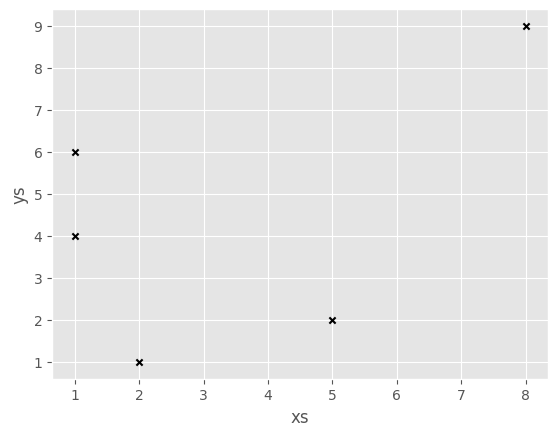

In [6]:

import matplotlib.pyplot as plt

# Ensure plots are shown inline in Jupyter notebooks
%matplotlib inline

# Use the 'ggplot' style for plots
plt.style.use('ggplot')

# Create the DataFrame
df = pd.DataFrame({"xs": [1, 5, 2, 8, 1], "ys": [4, 2, 1, 9, 6]})

# Create a scatter plot with black X markers
df.plot.scatter(x='xs', y='ys', color='black', marker='x')

# Show the plot
plt.show()


57. Columns in your DataFrame can also be used to modify colors and sizes. Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning. Make a plot which incorporates all four features of this DataFrame.

(Hint: If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

The chart doesn't have to be pretty: this isn't a course in data viz!

df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

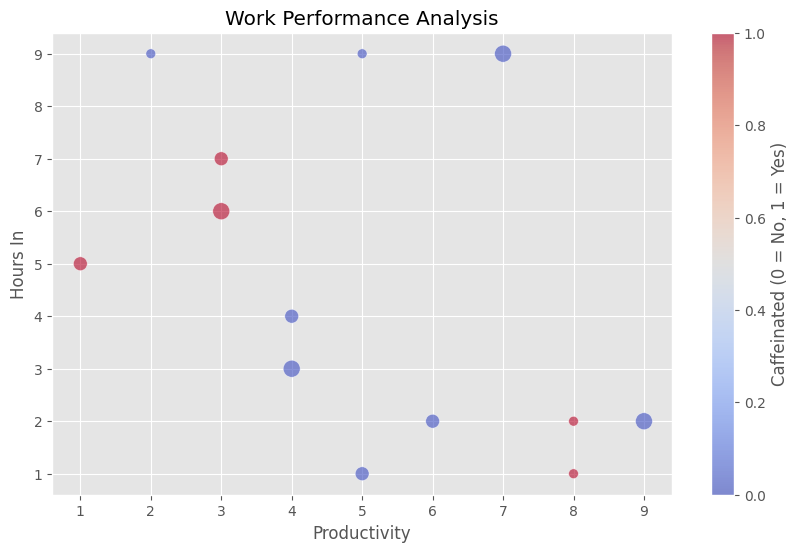

In [7]:
# DataFrame
df = pd.DataFrame({
    "productivity": [5, 2, 3, 1, 4, 5, 6, 7, 8, 3, 4, 8, 9],
    "hours_in": [1, 9, 6, 5, 3, 9, 2, 9, 1, 7, 4, 2, 2],
    "happiness": [2, 1, 3, 2, 3, 1, 2, 3, 1, 2, 2, 1, 3],
    "caffeinated": [0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0]
})

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(
    x=df['productivity'],
    y=df['hours_in'],
    s=df['happiness'] * 50,  # Scale up the size for visibility
    c=df['caffeinated'],
    cmap='coolwarm',
    alpha=0.6,
    edgecolors='w',
    linewidth=0.5
)

# Add color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Caffeinated (0 = No, 1 = Yes)')

# Add labels and title
plt.xlabel('Productivity')
plt.ylabel('Hours In')
plt.title('Work Performance Analysis')

# Show plot
plt.show()

58. What if we want to plot multiple things? Pandas allows you to pass in a matplotlib Axis object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

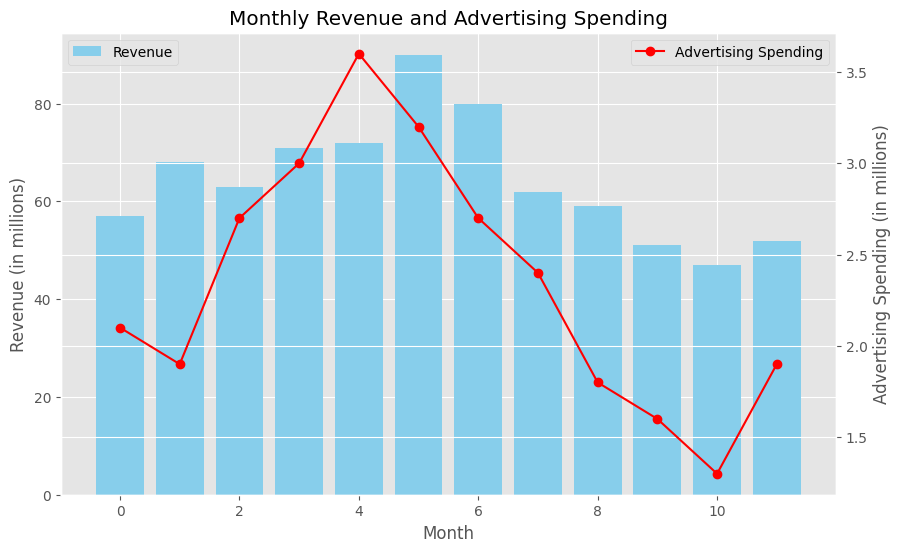

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# DataFrame
df = pd.DataFrame({
    "revenue": [57, 68, 63, 71, 72, 90, 80, 62, 59, 51, 47, 52],
    "advertising": [2.1, 1.9, 2.7, 3.0, 3.6, 3.2, 2.7, 2.4, 1.8, 1.6, 1.3, 1.9],
    "month": range(12)
})

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for revenue
ax1.bar(df['month'], df['revenue'], color='skyblue', label='Revenue')
ax1.set_xlabel('Month')
ax1.set_ylabel('Revenue (in millions)')
ax1.set_title('Monthly Revenue and Advertising Spending')

# Create a second y-axis to share the x-axis
ax2 = ax1.twinx()
ax2.plot(df['month'], df['advertising'], color='red', marker='o', label='Advertising Spending')
ax2.set_ylabel('Advertising Spending (in millions)')

# Add legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show plot
plt.show()


In [9]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

59. Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices


In [10]:
import pandas as pd
import numpy as np

# Define parameters for the trading day
trading_minutes = 6.5 * 60  # 6.5 hours of trading (9:30 AM to 4:00 PM)
np.random.seed(0)  # For reproducibility

# Generate random minute-by-minute stock prices
minute_prices = np.random.normal(loc=100, scale=1, size=int(trading_minutes))

# Create a DataFrame with minute-by-minute stock prices
minute_times = pd.date_range(start='9:30', end='16:00', freq='T')[:-1]  # Exclude the last time point
df = pd.DataFrame({'price': minute_prices}, index=minute_times)

# Function to aggregate minute data into hourly summaries
def aggregate_to_hourly(data):
    hourly_summary = data.resample('H').agg({
        'price': ['first', 'max', 'min', 'last']
    })
    hourly_summary.columns = ['Opening Price', 'Highest Price', 'Lowest Price', 'Closing Price']
    return hourly_summary

# Aggregate to hourly summaries
hourly_summary = aggregate_to_hourly(df)

# Display the hourly summary
print(hourly_summary)


                     Opening Price  Highest Price  Lowest Price  Closing Price
2024-05-31 09:00:00     101.764052     102.269755     97.447010     101.469359
2024-05-31 10:00:00     100.154947     101.950775     98.019204     101.054452
2024-05-31 11:00:00      99.596823     102.383145     98.508742      99.538415
2024-05-31 12:00:00      99.931758     102.163236     97.776597      99.901850
2024-05-31 13:00:00     100.910179     102.259309     97.930015     100.097400
2024-05-31 14:00:00     100.399046     102.303917     97.227407     100.943261
2024-05-31 15:00:00     100.747188     101.659551     97.340828     100.164228


C:\Users\evazquez\AppData\Local\Temp\ipykernel_19184\3440516143.py:12: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  minute_times = pd.date_range(start='9:30', end='16:00', freq='T')[:-1]  # Exclude the last time point
C:\Users\evazquez\AppData\Local\Temp\ipykernel_19184\3440516143.py:17: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_summary = data.resample('H').agg({


60. Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart. Use the plot_candlestick(df) function above, or matplotlib's plot documentation if you get stuck.



C:\Users\evazquez\AppData\Local\Temp\ipykernel_19184\1986638926.py:13: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  minute_times = pd.date_range(start='9:30', end='16:00', freq='T')[:-1]  # Exclude the last time point
C:\Users\evazquez\AppData\Local\Temp\ipykernel_19184\1986638926.py:18: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  hourly_summary = data.resample('H').agg({


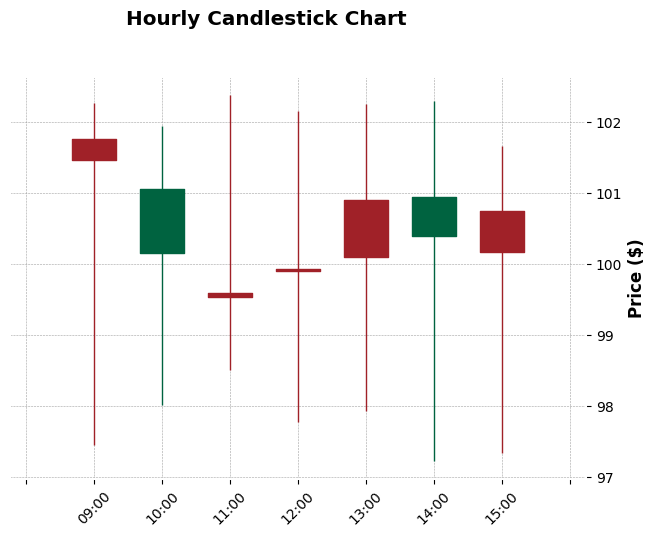

In [11]:
import pandas as pd
import numpy as np
import mplfinance as mpf

# Define parameters for the trading day
trading_minutes = 6.5 * 60  # 6.5 hours of trading (9:30 AM to 4:00 PM)
np.random.seed(0)  # For reproducibility

# Generate random minute-by-minute stock prices
minute_prices = np.random.normal(loc=100, scale=1, size=int(trading_minutes))

# Create a DataFrame with minute-by-minute stock prices
minute_times = pd.date_range(start='9:30', end='16:00', freq='T')[:-1]  # Exclude the last time point
df = pd.DataFrame({'price': minute_prices}, index=minute_times)

# Function to aggregate minute data into hourly summaries
def aggregate_to_hourly(data):
    hourly_summary = data.resample('H').agg({
        'price': ['first', 'max', 'min', 'last']
    })
    hourly_summary.columns = ['Open', 'High', 'Low', 'Close']
    return hourly_summary

# Aggregate to hourly summaries
hourly_summary = aggregate_to_hourly(df)

# Prepare data for mplfinance
hourly_summary.index.name = 'Date'
hourly_summary.reset_index(inplace=True)
hourly_summary['Date'] = pd.to_datetime(hourly_summary['Date'])

# Set the 'Date' as the index
hourly_summary.set_index('Date', inplace=True)

# Plot candlestick chart using mplfinance
mpf.plot(hourly_summary, type='candle', style='charles', title='Hourly Candlestick Chart', ylabel='Price ($)', volume=False)
